In [33]:
import math
import openmc
import openmc.deplete
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

In [2]:
fuel = openmc.Material(name="uo2")
fuel.add_nuclide('Pu238',2.332,'wo')
fuel.add_nuclide('Pu239',56.873,'wo')
fuel.add_nuclide('Pu240',26.997,'wo')
fuel.add_nuclide('Pu241',6.105,'wo')
fuel.add_nuclide('Pu242',7.693,'wo')
fuel.add_nuclide('U234',0.003,'wo')
fuel.add_nuclide('U235',0.404,'wo')
fuel.add_nuclide('U236',0.010,'wo')
fuel.add_nuclide('U238',99.583,'wo')
fuel.set_density("g/cc", 11)
fuel.depletable=True


clad = openmc.Material(name="clad")
clad.add_element('Cr',15.0,'wo')
clad.add_element('Ni',15.0,'wo')
clad.add_element('Mo',1.5,'wo')
clad.add_element('Mn',1.5,'wo')
clad.add_element('Si',0.9,'wo')
clad.add_element('Ti',0.4,'wo')
clad.add_element('C',0.09,'wo')
clad.set_density("g/cc",8)
clad.depletable=True

LM = openmc.Material(name="LM")
LM.add_element("Pb",1)
LM.set_density("g/cc",10)

materials = openmc.Materials([fuel, clad, LM])

In [3]:
print(f"Fuel material ID: {clad.id}")

Fuel material ID: 2


In [4]:
radii = [0.42, 0.45]

In [5]:
pin_surfaces = [openmc.ZCylinder(r=r) for r in radii]
pin_univ = openmc.model.pin(pin_surfaces, materials)

In [6]:
bound_box = openmc.model.RectangularPrism(2.6, 2.6, boundary_type="reflective")
root_cell = openmc.Cell(fill=pin_univ, region=-bound_box)
geometry = openmc.Geometry([root_cell])

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

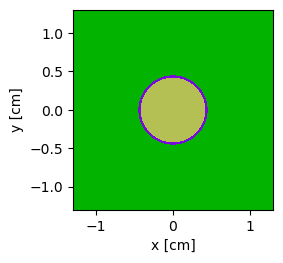

In [7]:
geometry.root_universe.plot()

In [8]:
settings = openmc.Settings()
settings.particles = 1000
settings.inactive = 10
settings.batches = 50

In [9]:
fuel.volume = math.pi * radii[0] ** 2
clad.volume = math.pi * (radii[1]-radii[0]) ** 2

In [10]:
chain = openmc.deplete.Chain.from_xml("chain_endfb80_sfr.xml")
chain.nuclide_dict

{'H1': 0,
 'H2': 1,
 'H3': 2,
 'H4': 3,
 'H5': 4,
 'H6': 5,
 'H7': 6,
 'He3': 7,
 'He4': 8,
 'He5': 9,
 'He6': 10,
 'He7': 11,
 'He8': 12,
 'He9': 13,
 'He10': 14,
 'Li4': 15,
 'Li5': 16,
 'Li6': 17,
 'Li7': 18,
 'Li8': 19,
 'Li9': 20,
 'Li10': 21,
 'Li11': 22,
 'Li12': 23,
 'Be5': 24,
 'Be6': 25,
 'Be7': 26,
 'Be8': 27,
 'Be9': 28,
 'Be10': 29,
 'Be11': 30,
 'Be12': 31,
 'Be13': 32,
 'Be14': 33,
 'Be15': 34,
 'Be16': 35,
 'B6': 36,
 'B7': 37,
 'B8': 38,
 'B9': 39,
 'B10': 40,
 'B11': 41,
 'B12': 42,
 'B13': 43,
 'B14': 44,
 'B15': 45,
 'B16': 46,
 'B17': 47,
 'B18': 48,
 'B19': 49,
 'C8': 50,
 'C9': 51,
 'C10': 52,
 'C11': 53,
 'C12': 54,
 'C13': 55,
 'C14': 56,
 'C15': 57,
 'C16': 58,
 'C17': 59,
 'C18': 60,
 'C19': 61,
 'C20': 62,
 'C21': 63,
 'C22': 64,
 'N10': 65,
 'N11': 66,
 'N12': 67,
 'N13': 68,
 'N14': 69,
 'N15': 70,
 'N16': 71,
 'N17': 72,
 'N18': 73,
 'N19': 74,
 'N20': 75,
 'N21': 76,
 'N22': 77,
 'N23': 78,
 'N24': 79,
 'N25': 80,
 'O12': 81,
 'O13': 82,
 'O14': 83,
 'O1

In [11]:
model = openmc.Model(geometry=geometry, settings=settings)
operator = openmc.deplete.CoupledOperator(model, "chain_endfb80_sfr.xml")

In [12]:
power = 210

In [13]:
time_steps = [30] * 6

In [14]:
integrator = openmc.deplete.PredictorIntegrator(operator, time_steps, power, timestep_units='d')

In [15]:
integrator.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Mg24 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Mg24.h5
 Reading Mg25 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Mg25.h5
 Reading Mg26 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Mg26.h5
 Reading Al27 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Al27.h5
 Reading P31 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/P31.h5
 Reading S32 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/S32.h5
 Reading S33 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/S33.h5
 Reading S34 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/S34.h5
 Reading S36 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/S36.h5
 Reading Cl35 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cl35.h5
 Reading Cl37 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cl37.h5
 Reading Ar36 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ar36.h5
 Reading Ar38 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ar38.h5
 Reading Ar40 from /home/orion/Downloads/endfb-v

 Reading K41 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/K41.h5
 Reading Ca40 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ca40.h5
 Reading Ca42 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ca42.h5
 Reading Ca43 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ca43.h5
 Reading Ca44 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ca44.h5
 Reading Ca46 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ca46.h5
 Reading Ca48 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ca48.h5
 Reading Sc45 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sc45.h5
 Reading V50 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/V50.h5
 Reading V51 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/V51.h5
 Reading Fe54 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Fe54.h5
 Reading Fe56 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Fe56.h5
 Reading Fe57 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Fe57.h5
 Reading Fe58 from /home/orion/Downloads/end

 Reading Kr80 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Kr80.h5
 Reading Kr82 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Kr82.h5
 Reading Kr83 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Kr83.h5
 Reading Kr84 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Kr84.h5
 Reading Kr85 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Kr85.h5
 Reading Kr86 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Kr86.h5
 Reading Rb85 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Rb85.h5
 Reading Rb86 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Rb86.h5
 Reading Rb87 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Rb87.h5
 Reading Sr84 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sr84.h5
 Reading Sr86 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sr86.h5
 Reading Sr87 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sr87.h5
 Reading Sr88 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sr88.h5
 Reading Sr89 from /home/orion/Downloa

 Reading Ru96 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru96.h5
 Reading Ru98 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru98.h5
 Reading Ru99 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru99.h5
 Reading Ru100 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru100.h5
 Reading Ru101 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru101.h5
 Reading Ru102 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru102.h5
 Reading Ru103 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru103.h5
 Reading Ru104 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru104.h5
 Reading Ru105 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru105.h5
 Reading Ru106 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ru106.h5
 Reading Rh103 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Rh103.h5
 Reading Rh105 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Rh105.h5
 Reading Pd102 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Pd102.h5
 Reading Pd104 fro

          1200K
          2500K


 Reading Cd108 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cd108.h5
 Reading Cd110 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cd110.h5
 Reading Cd111 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cd111.h5
 Reading Cd112 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cd112.h5
 Reading Cd113 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cd113.h5
 Reading Cd114 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cd114.h5
 Reading Cd115_m1 from
 /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cd115_m1.h5
 Reading Cd116 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cd116.h5
 Reading In113 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/In113.h5
 Reading In115 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/In115.h5
 Reading Sn112 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sn112.h5
 Reading Sn113 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sn113.h5
 Reading Sn114 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sn114.h5
 Read

          1200K
          2500K
          1200K
          2500K


 Reading Sn125 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sn125.h5
 Reading Sn126 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sn126.h5
 Reading Sb121 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sb121.h5
 Reading Sb123 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sb123.h5
 Reading Sb124 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sb124.h5
 Reading Sb125 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sb125.h5
 Reading Sb126 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Sb126.h5
 Reading Te120 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Te120.h5
 Reading Te122 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Te122.h5
 Reading Te123 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Te123.h5
 Reading Te124 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Te124.h5
 Reading Te125 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Te125.h5
 Reading Te126 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Te126.h5
 Reading Te1

 Reading Xe126 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe126.h5
 Reading Xe128 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe128.h5
 Reading Xe129 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe129.h5
 Reading Xe130 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe130.h5
 Reading Xe131 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe131.h5
 Reading Xe132 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe132.h5
 Reading Xe133 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe133.h5
 Reading Xe134 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe134.h5


          2500K
          1200K
          2500K


 Reading Xe135 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe135.h5
 Reading Xe136 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Xe136.h5
 Reading Cs133 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cs133.h5
 Reading Cs134 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cs134.h5
 Reading Cs135 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cs135.h5
 Reading Cs136 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cs136.h5
 Reading Cs137 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cs137.h5
 Reading Ba130 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ba130.h5
 Reading Ba132 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ba132.h5
 Reading Ba133 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ba133.h5
 Reading Ba134 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ba134.h5
 Reading Ba135 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ba135.h5
 Reading Ba136 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Ba136.h5
 Reading Ba1

          1200K
          2500K


 Reading Gd153 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Gd153.h5
 Reading Gd154 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Gd154.h5
 Reading Gd155 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Gd155.h5
 Reading Gd156 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Gd156.h5
 Reading Gd157 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Gd157.h5
 Reading Gd158 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Gd158.h5
 Reading Gd160 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Gd160.h5
 Reading Tb159 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Tb159.h5
 Reading Tb160 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Tb160.h5
 Reading Dy156 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Dy156.h5
 Reading Dy158 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Dy158.h5
 Reading Dy160 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Dy160.h5
 Reading Dy161 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Dy161.h5
 Reading Dy1

          1200K


 Reading Cf254 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Cf254.h5
 Reading Es251 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Es251.h5
 Reading Es252 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Es252.h5
 Reading Es253 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Es253.h5
 Reading Es254 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Es254.h5
 Reading Es254_m1 from
 /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Es254_m1.h5
 Reading Es255 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Es255.h5
 Reading Fm255 from /home/orion/Downloads/endfb-vii.1-hdf5/neutron/Fm255.h5
 Maximum neutron transport energy: 8100000 eV for Be7
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.95446
        2/1    1.89067
        3/1    2.01967
        4/1    1.95435
        5/1    1.98845
        6/1    1.

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.92446
        2/1    1.94146
        3/1    1.89945
        4/1    1.95500
        5/1    2.02065
        6/1    1.94242
        7/1    1.96547
        8/1    1.95990
        9/1    1.96597
       10/1    1.90794
       11/1    1.90207
       12/1    1.94591    1.92399 +/- 0.02192
       13/1    2.03476    1.96092 +/- 0.03903
       14/1    1.98687    1.96741 +/- 0.02835
       15/1    1.98803    1.97153 +/- 0.02235
       16/1    1.81125    1.94482 +/- 0.03235
       17/1    1.93516    1.94344 +/- 0.02738
       18/1    1.92105    1.94064 +/- 0.02387
       19/1    2.03194    1.95078 +/- 0.02337
       20/1    2.02605    1.95831 +/- 0.02222
       21/1    1.92712    1.95547 +/- 0.02029
       22/1    1.95436    1.95538 +/- 0.01853
       23/1    1.88983    1.95034 +/- 0.01

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.95462
        2/1    1.98870
        3/1    2.01422
        4/1    1.95727
        5/1    1.94138
        6/1    1.94535
        7/1    1.98897
        8/1    2.04477
        9/1    1.97790
       10/1    1.95958
       11/1    2.01874
       12/1    2.00302    2.01088 +/- 0.00786
       13/1    1.98358    2.00178 +/- 0.01017
       14/1    1.97849    1.99596 +/- 0.00925
       15/1    1.87532    1.97183 +/- 0.02517
       16/1    1.86625    1.95423 +/- 0.02706
       17/1    1.92647    1.95027 +/- 0.02321
       18/1    1.96241    1.95178 +/- 0.02016
       19/1    1.93697    1.95014 +/- 0.01785
       20/1    1.87136    1.94226 +/- 0.01780
       21/1    2.07175    1.95403 +/- 0.01995
       22/1    2.02373    1.95984 +/- 0.01911
       23/1    1.96443    1.96019 +/- 0.01

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.95362
        2/1    1.94985
        3/1    1.88401
        4/1    1.97724
        5/1    1.92869
        6/1    1.93404
        7/1    1.99473
        8/1    1.84813
        9/1    1.99543
       10/1    1.86276
       11/1    1.96041
       12/1    1.96688    1.96364 +/- 0.00324
       13/1    1.98202    1.96977 +/- 0.00640
       14/1    1.88245    1.94794 +/- 0.02230
       15/1    1.90385    1.93912 +/- 0.01939
       16/1    2.03137    1.95450 +/- 0.02207
       17/1    1.89112    1.94544 +/- 0.02073
       18/1    1.94407    1.94527 +/- 0.01796
       19/1    1.89291    1.93945 +/- 0.01687
       20/1    2.00968    1.94648 +/- 0.01664
       21/1    1.97123    1.94873 +/- 0.01522
       22/1    1.90743    1.94528 +/- 0.01432
       23/1    1.97502    1.94757 +/- 0.01

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.98484
        2/1    1.94356
        3/1    1.92807
        4/1    1.91647
        5/1    1.90574
        6/1    1.92556
        7/1    1.95456
        8/1    2.00011
        9/1    1.86852
       10/1    1.95273
       11/1    2.01067
       12/1    2.05290    2.03178 +/- 0.02112
       13/1    1.96729    2.01029 +/- 0.02471
       14/1    1.97000    2.00021 +/- 0.02017
       15/1    1.89904    1.97998 +/- 0.02556
       16/1    2.02334    1.98721 +/- 0.02209
       17/1    1.98268    1.98656 +/- 0.01868
       18/1    2.04278    1.99359 +/- 0.01764
       19/1    1.92705    1.98619 +/- 0.01722
       20/1    1.83187    1.97076 +/- 0.02180
       21/1    1.90713    1.96498 +/- 0.02055
       22/1    1.91173    1.96054 +/- 0.01928
       23/1    1.99731    1.96337 +/- 0.01

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.90521
        2/1    1.96993
        3/1    1.90883
        4/1    1.95974
        5/1    1.96334
        6/1    1.96238
        7/1    1.96400
        8/1    1.95523
        9/1    1.93249
       10/1    1.98544
       11/1    1.95927
       12/1    1.91958    1.93943 +/- 0.01984
       13/1    1.86642    1.91509 +/- 0.02690
       14/1    1.92245    1.91693 +/- 0.01911
       15/1    1.96036    1.92562 +/- 0.01716
       16/1    1.91396    1.92367 +/- 0.01414
       17/1    1.91169    1.92196 +/- 0.01208
       18/1    2.08539    1.94239 +/- 0.02295
       19/1    1.88319    1.93581 +/- 0.02128
       20/1    1.88330    1.93056 +/- 0.01975
       21/1    1.93237    1.93073 +/- 0.01786
       22/1    1.88507    1.92692 +/- 0.01674
       23/1    1.94310    1.92817 +/- 0.01

 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.94891
        2/1    1.90498
        3/1    1.98307
        4/1    1.97638
        5/1    2.02956
        6/1    1.92362
        7/1    2.04990
        8/1    1.96382
        9/1    1.90901
       10/1    1.94229
       11/1    1.89054
       12/1    1.87955    1.88504 +/- 0.00549
       13/1    1.90771    1.89260 +/- 0.00819
       14/1    1.99668    1.91862 +/- 0.02666
       15/1    1.96160    1.92721 +/- 0.02237
       16/1    2.09392    1.95500 +/- 0.03325
       17/1    1.93111    1.95159 +/- 0.02831
       18/1    1.95249    1.95170 +/- 0.02452
       19/1    2.00577    1.95771 +/- 0.02244
       20/1    1.91799    1.95373 +/- 0.02046
       21/1    1.97843    1.95598 +/- 0.01864
       22/1    2.00904    1.96040 +/- 0.01758
       23/1    1.98249    1.96210 +/- 0.01

In [16]:
results = openmc.deplete.Results("./depletion_results.h5")

In [17]:
time, k = results.get_keff()

In [18]:
time /= (24 * 60 * 60)  # convert back to days from seconds

In [19]:
k

array([[1.95445598, 0.00329811],
       [1.95327908, 0.00364164],
       [1.95384556, 0.00454462],
       [1.94809352, 0.00363814],
       [1.94635682, 0.00324592],
       [1.94268062, 0.00410337],
       [1.93282062, 0.00354712]])

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_7078/1741926294.py:3: SyntaxWarning: invalid escape sequence '\p'
  pyplot.ylabel("$k_{eff}\pm \sigma$");


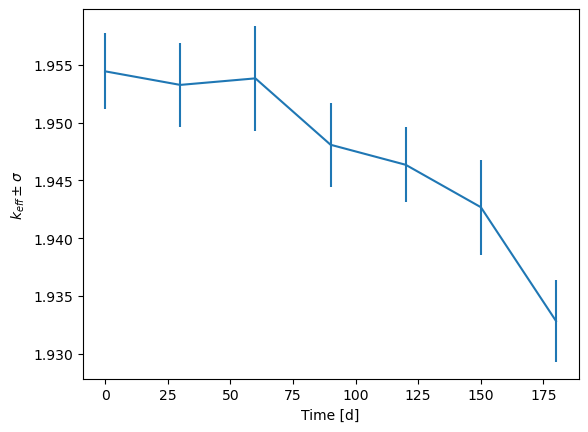

In [34]:
pyplot.errorbar(time, k[:, 0], yerr=k[:, 1])
pyplot.xlabel("Time [d]")
pyplot.ylabel("$k_{eff}\pm \sigma$");

+ Il materiale Cladding ha numero identificativo $ID:2$
+ Il materiale Fuel ha numero identificativo $ID:1$

In [53]:
_, u235 = results.get_atoms("1", "U235")
_, xe135 = results.get_atoms("1", "Xe135")
_,he4=results.get_atoms("2","He4")
_,ni58=results.get_atoms("2","Ni58")
_,ni59=results.get_atoms("2","Ni59")
_,Fe56=results.get_atoms("2","Fe56")
_,u235=results.get_atoms("1","U235")
_,u238=results.get_atoms("1","U238")
_,pu239=results.get_atoms("1","Pu239")
_,pu238=results.get_atoms("1","Pu238")

In [64]:
"""plt.plot(time, he4, label="He4")
plt.xlabel("Time [d]")
plt.ylabel("Number of atoms - He4");"""

'plt.plot(time, he4, label="He4")\nplt.xlabel("Time [d]")\nplt.ylabel("Number of atoms - He4");'

In [37]:
max_he4=np.max(he4)
print(f"Max He4: {max_he4:.3e}")

Max He4: 6.777e+15


la quantita di He generata nel cladding è riferita ad un ciclidro coassiale di lunghezza $1[cm]$ quindi dato che la lunghezza totale di un fuel rod (non lunghezza attiva) in cui si possono formare atomi di $He$ è lunga $1\cdot 10^2 [cm]$ allora questo valore va moliplicato per $100$, ovvero $6.77\cdot 10^{17}$

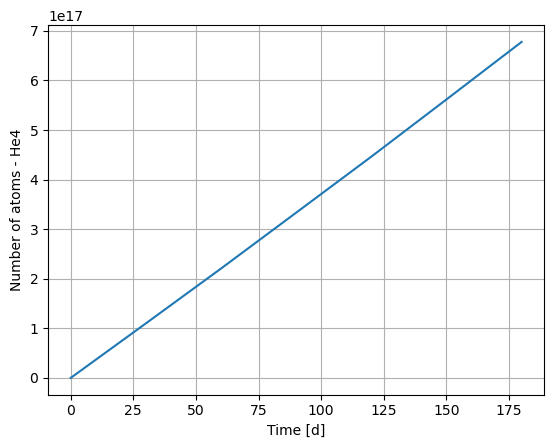

In [38]:
plt.plot(time, he4*100, label="He4")
plt.xlabel("Time [d]")
plt.ylabel("Number of atoms - He4");
plt.grid()

"axs[3, 0].plot(t, YH[:,3])\naxs[3, 0].set_title('Coolant temperature (°C)')\naxs[3, 0].grid()\naxs[4, 0].plot(t, YH[:,4],)\naxs[4, 0].set_title('Coolant outlet temperature (°C)')\naxs[4, 0].grid()\naxs[5, 0].plot(t, YH[:,5]*10**5, )\naxs[5, 0].set_title('Total reactivity (pcm)')\naxs[5, 0].grid()"

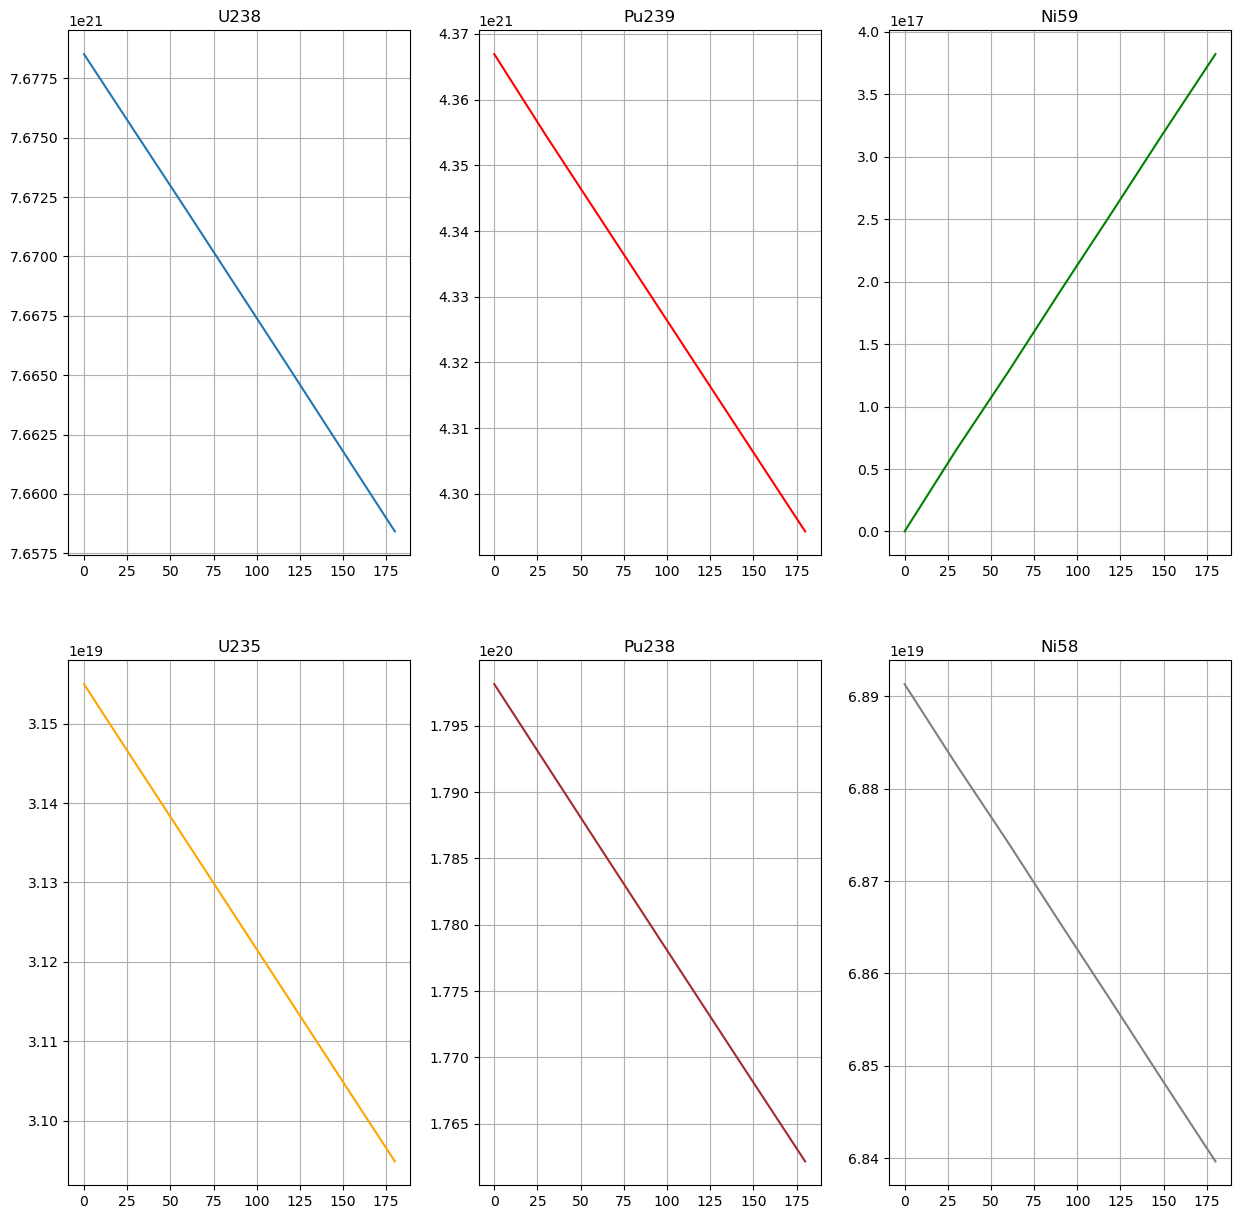

In [61]:
fig, axs = plt.subplots(2, 3,figsize=(15, 15))
axs[0, 0].plot(time, u238)
axs[0, 0].set_title('U238')
axs[0, 0].grid()
axs[0, 1].plot(time, pu239,color='red')
axs[0, 1].set_title('Pu239')
axs[0, 1].grid()
axs[1, 1].plot(time, pu238,color='brown')
axs[1, 1].set_title('Pu238')
axs[1, 1].grid()
axs[1, 0].plot(time, u235,color='orange')
axs[1, 0].set_title('U235')
axs[1, 0].grid()
axs[0, 2].plot(time, ni59,color='green')
axs[0, 2].set_title('Ni59')
axs[0, 2].grid()
axs[1, 2].plot(time, ni58,color='gray')
axs[1, 2].set_title('Ni58')
axs[1, 2].grid()
"""axs[3, 0].plot(t, YH[:,3])
axs[3, 0].set_title('Coolant temperature (°C)')
axs[3, 0].grid()
axs[4, 0].plot(t, YH[:,4],)
axs[4, 0].set_title('Coolant outlet temperature (°C)')
axs[4, 0].grid()
axs[5, 0].plot(t, YH[:,5]*10**5, )
axs[5, 0].set_title('Total reactivity (pcm)')
axs[5, 0].grid()"""

# Tallies